# Лабораторная работа  8

Кластеризация

Выполнил: 6133-010402D, Харитонов Никита Владимирович

Полезные материалы:
- [статья про кластеризацию и понижение размерности от ODS](https://habr.com/ru/company/ods/blog/325654/)
- [методичка по кластеризации из курса Яндекс/МФТИ](https://github.com/Tirren/data-analysis/blob/master/Machine%20learning/coursera/Notes/3%20%D0%BA%D1%83%D1%80%D1%81/1-1.Vvedenie_v_klasterizaciyu.pdf)



0 Найти датасет для кластеризации: для этого берём датасет для мультиклассовой классификации и временно убираем метки классов. Эти метки классов пригодятся нам для оценки качества кластеризации. Хотя в реальной жизни такой роскоши скорее всего не будет, однако наличие априорного знания о кластерах позволит нам посчитать несколько дополнительных метрик.
Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.


In [1]:
!pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score

In [3]:
# load data
data = load_penguins()
# drop rows with at least one nan value
data.dropna(inplace=True)
# separate features and targets
X, y = data.drop(columns=['species', 'island', 'sex', 'year']), data['species']

In [4]:
X.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
6,38.9,17.8,181.0,3625.0
7,39.2,19.6,195.0,4675.0
12,41.1,17.6,182.0,3200.0
13,38.6,21.2,191.0,3800.0
14,34.6,21.1,198.0,4400.0


In [5]:
y.head(10)

0     Adelie
1     Adelie
2     Adelie
4     Adelie
5     Adelie
6     Adelie
7     Adelie
12    Adelie
13    Adelie
14    Adelie
Name: species, dtype: object

In [6]:
# все столбцы признаков вещественные:
# - bill_length_mm        длина клюва пингвина в мм
# - bill_depth_mm         высота клюва пингвина в мм
# - flipper_length_mm     длина плавника пингвина в мм
# - body_mass_g           масса тела пингвина в граммах

In [7]:
# столбец классов категориальный:
# - species               биологический вид пингвина: пингвин Адели, cубантарктический пингвин и антарктический пингвин


1 Выполните иерархическую агломеративную кластеризацию (`scipy.cluster.hierarchy`), постройте график-дендрограмму (`hierarchy.dendrogram`)


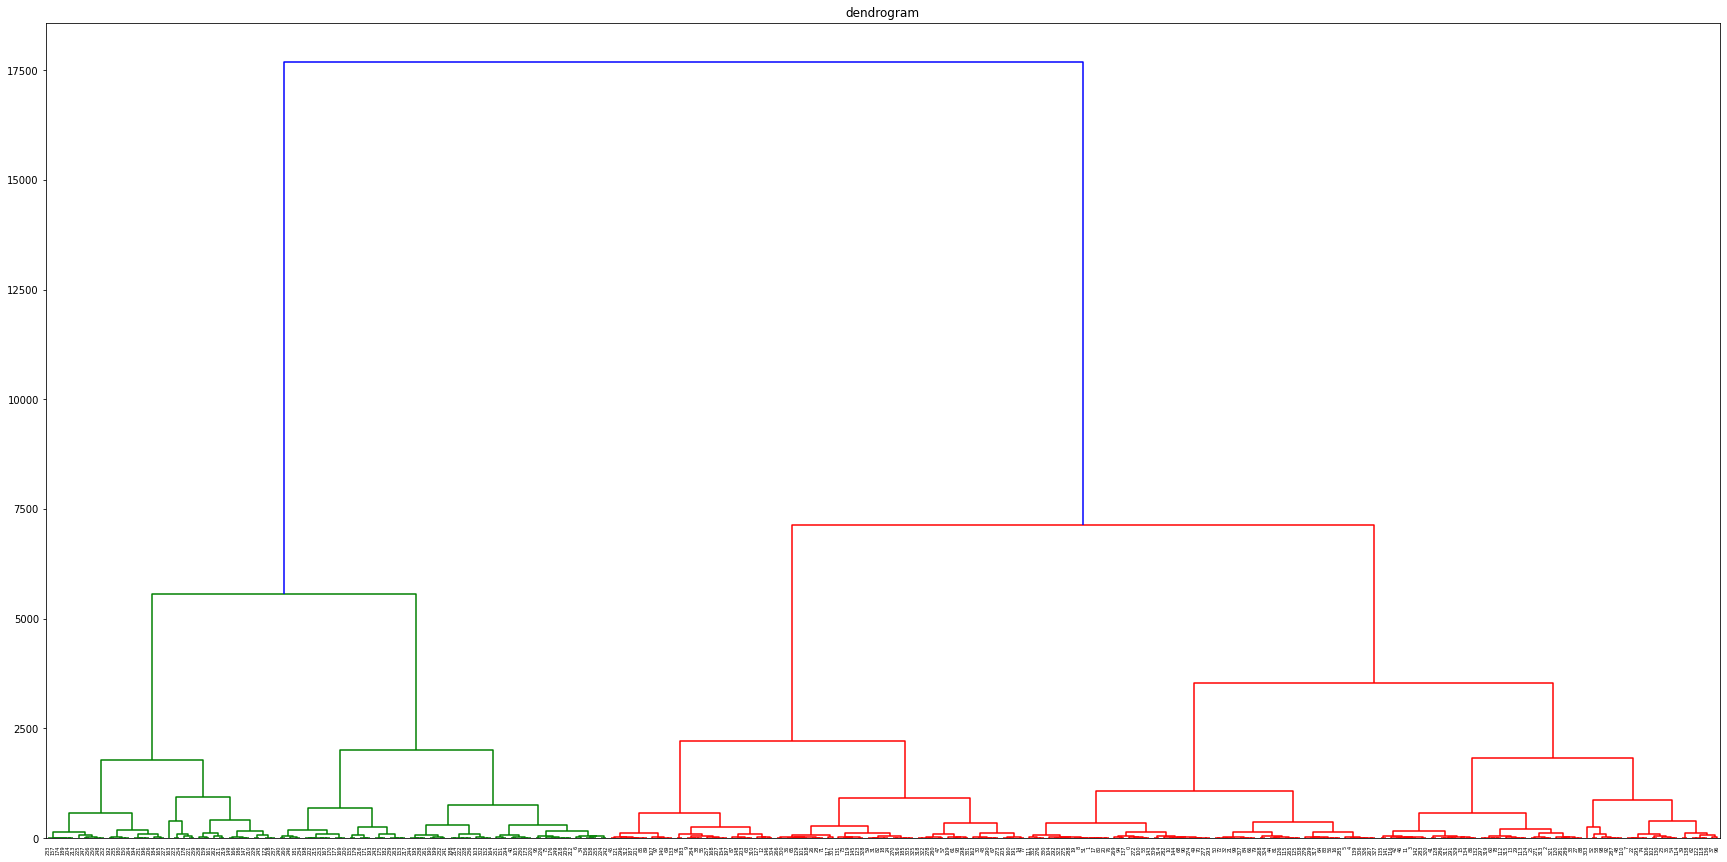

In [17]:
plt.figure(figsize=(30, 15))  
plt.title('dendrogram') 
clusters = linkage(X, 'ward')
d = dendrogram(clusters, distance_sort='descending', show_leaf_counts=True)


2 На том же датасете выподните кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X)

In [10]:
# encode targets to compare them with cluster_labels: convert strings to numbers
le = preprocessing.LabelEncoder()
class_names = data['species'].unique()
le.fit(class_names)
le.transform(class_names)
y_transformed = le.transform(y)

In [11]:
print(
    "ARI:", adjusted_rand_score(y_transformed, cluster_labels),
    "\nAMI:", adjusted_mutual_info_score(y_transformed, cluster_labels),
    "\nHomogeneity:", homogeneity_score(y_transformed, cluster_labels),
    "\nCompleteness:", completeness_score(y_transformed, cluster_labels),
    "\nV-measure:", v_measure_score(y_transformed, cluster_labels),
    "\nSilhouette:", silhouette_score(X, cluster_labels)
    )

ARI: 0.23338034223244855 
AMI: 0.34522598450546044 
Homogeneity: 0.440062084146016 
Completeness: 0.29229712781981515 
V-measure: 0.35127265734259266 
Silhouette: 0.532095389616728



3 Выполните оптимизацию гиперпараметров кластеризации (либо иерархической модели из п. 1, либо иной модели из п. 2, на ваш выбор; в случае иерархической кластеризации из п. 1 гиперпараметр — пороговое расстояние между центроидами, являющееся границей разбиения на кластеры). Оптимизацию выполните, используя одну из метрик качества кластеризации, для которых нам понадобится информация об исходных метках класса: Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Гомогенность, полнота, V-мера.


In [12]:
n_clusters_list = list(range(2,13)) # [2, 3, ..., 12]
ari_scores = []

for n_clusters in n_clusters_list:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = kmeans.fit_predict(X)
  ari_score = adjusted_rand_score(y, cluster_labels)
  ari_scores.append(ari_score)

In [13]:
idx_max = ari_scores.index(max(ari_scores))
print('best ARI:', ari_scores[idx_max])
print('best n_clusters:', n_clusters_list[idx_max])

best ARI: 0.4602965829191828
best n_clusters: 2


Таким образом, лучшее значение гиперпараметра n_clusters (количество кластеров) равно 2, при котором значение метрики ARI равно 0,4602965829191828. Возможная причина такого низкого значения ARI связана с малым количеством данных в датасете.


4 Используя алгоритм/модель из п. 2 выполните оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график *силуэта*)



In [14]:
scores = []

for n_clusters in n_clusters_list:
    clusters = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X)
    scores.append(silhouette_score(X, clusters))

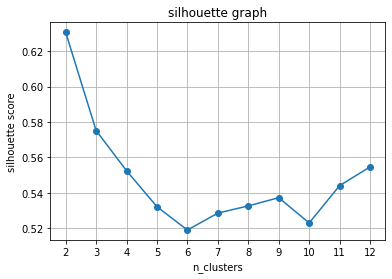

In [15]:
plt.plot(n_clusters_list, scores, 'o-')
plt.title('silhouette graph')
plt.xlabel('n_clusters')
plt.ylabel('silhouette score')
plt.xticks(n_clusters_list)
plt.grid()
plt.show()

Таким образом, на основании графика силуэта, можно сделать вывод, что оптимальное значение количества кластеров равно 2, так как чем выше значение метрики силуэта, тем качественнее кластеризация.